# Лабораторная работа №12

<font size="4">Пространственные методы обработки изображений"

In [1]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

<font size="4">Задание 6.1.
    
Создать файл с зашумлением изображения шумом типа соль-перец.

In [2]:
red, green, blue = (255, 0, 0), (0, 255, 0), (0, 0, 255)
rgb = [red, green, blue]

In [3]:
def sp_noise(image, prob):
    output = np.zeros(image.shape, np.uint8)
    thres = 1- prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rnd = random.random()
            if rnd > thres:
                output[i][j] = random.choice(rgb)
            else:
                output[i][j] = image[i][j]
    return output

In [4]:
image = cv2.imread('jojo.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (900, 600))

In [5]:
noise_img = sp_noise(image, 0.3)
res = np.hstack((image, noise_img))

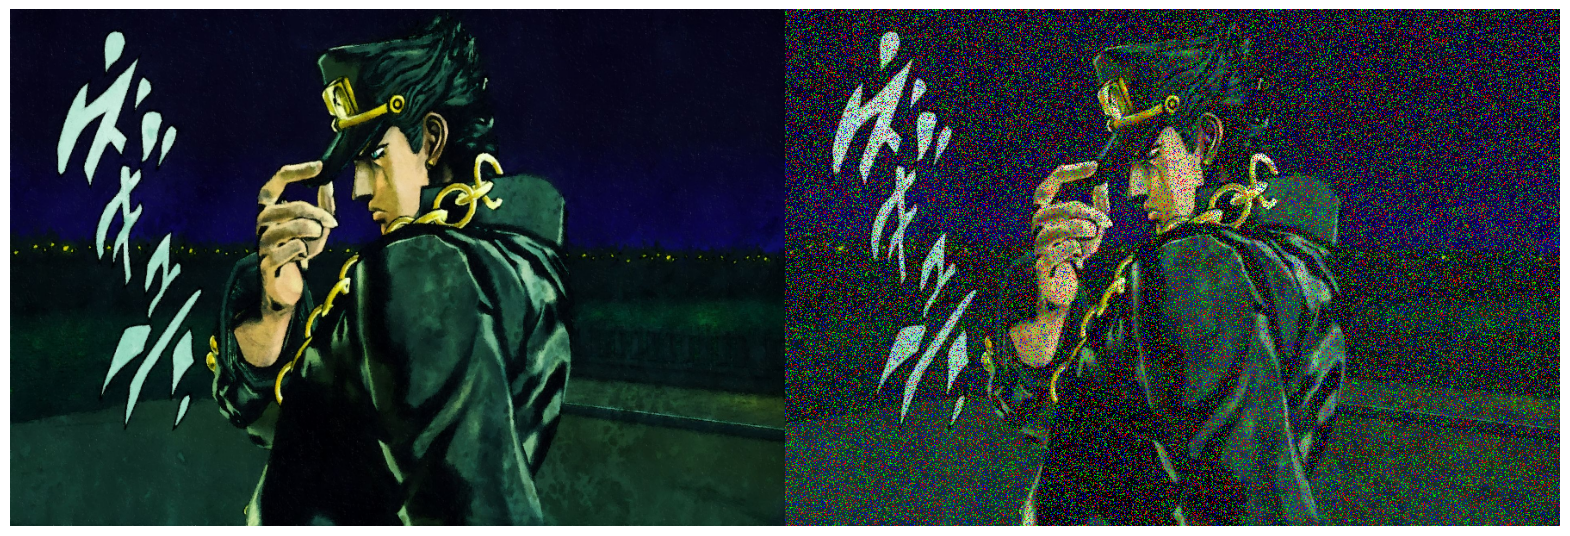

In [6]:
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(res);

<font size="4">Задание 6.2.

Провести сглаживание изображения с помощью функции cv2.filter2D (), используя ядро 5×5.

In [7]:
img = cv2.imread('jojo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [8]:
kernel = np.ones((5, 5), np.float32) / 25
dst = cv2.filter2D(img, -1, kernel)

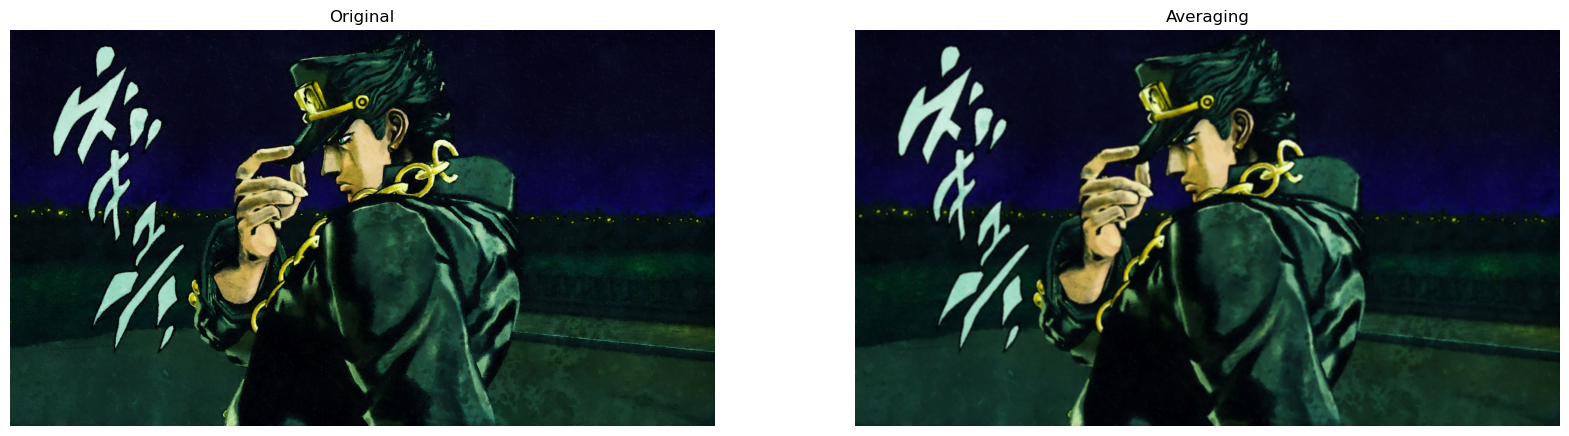

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.axis("off")
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.axis("off")
plt.show()

<font size="4">Задание 6.3.
    
Провести усреднение изображения с помощью функции cv2.blur (), используя ядро 5×5.

In [10]:
img = cv2.imread('jojo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
blur = cv2.blur(img, (5, 5))

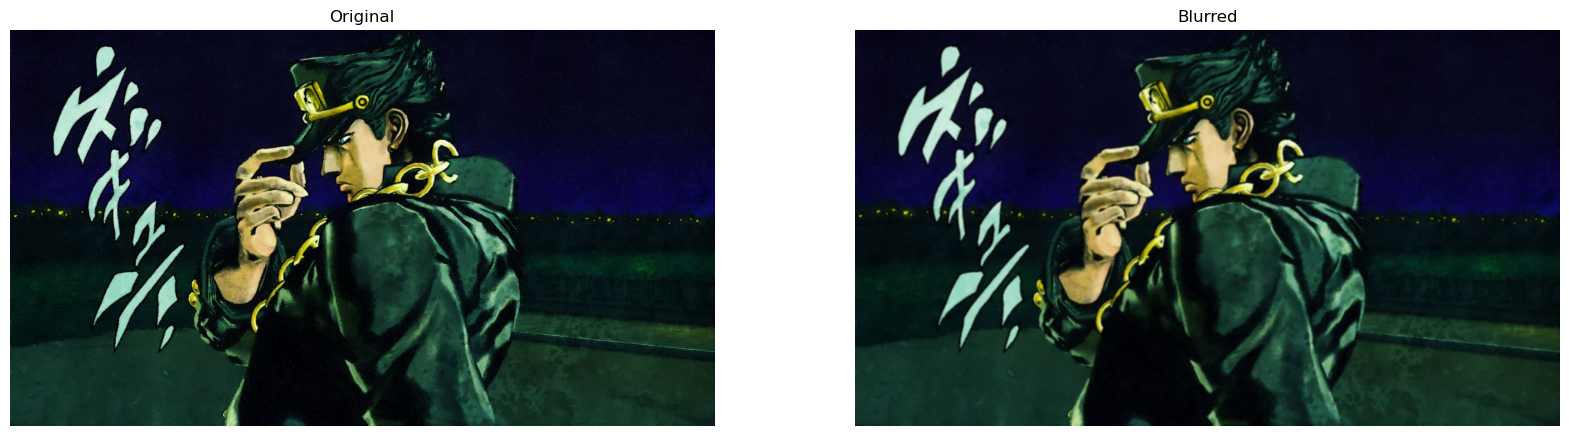

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img), plt.title('Original')
plt.axis("off")
plt.subplot(122),plt.imshow(blur), plt.title('Blurred')
plt.axis("off")
plt.show()

<font size="4">Задание 6.4.

Добавить к исходному изображению 20−30% шума. Провести фильтрацию изображения по Гауссу, используя ядро 5×5.

In [13]:
img = cv2.imread('jojo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [14]:
blur = cv2.GaussianBlur(img, (5 ,5), 0)

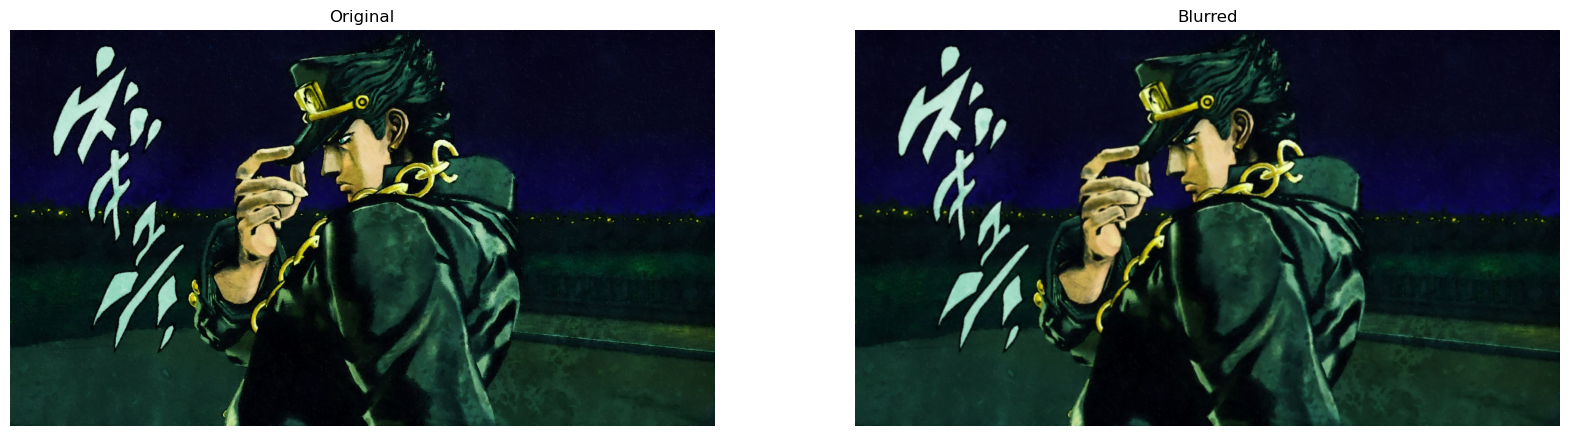

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img), plt.title('Original')
plt.axis("off")
plt.subplot(122),plt.imshow(blur), plt.title('Blurred')
plt.axis("off")
plt.show()

<font size="4">Задание 6.5.

Добавить к исходному изображению 20–50% шума. Провести медианную фильтрацию изображения, используя ядро 5×5.

In [16]:
img = cv2.imread('jojo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [17]:
median = cv2.medianBlur(img,5)

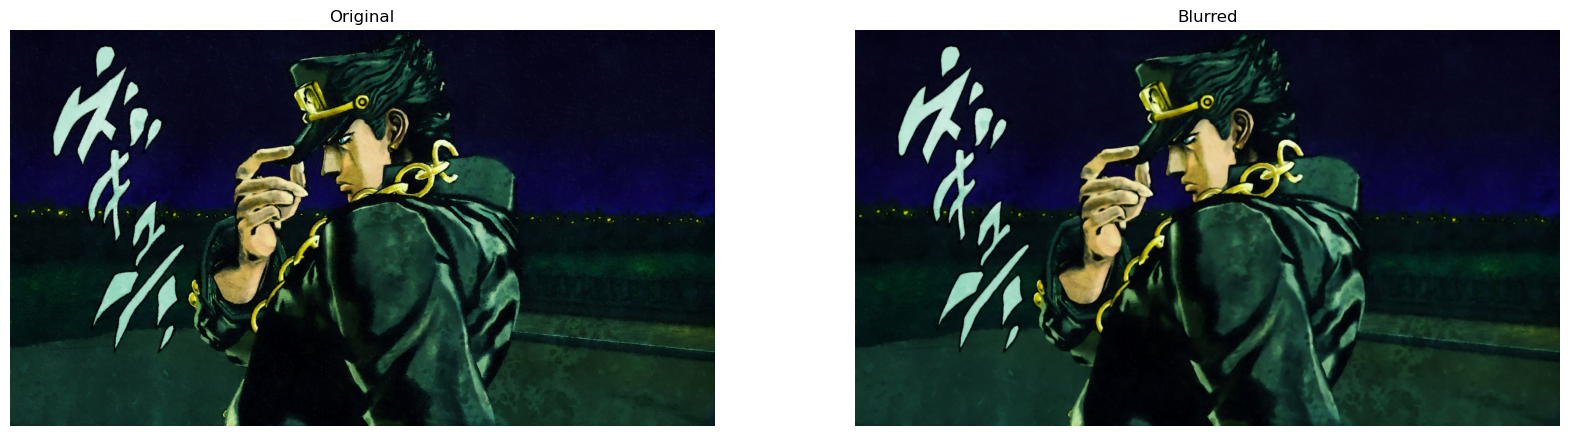

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img), plt.title('Original')
plt.axis("off")
plt.subplot(122),plt.imshow(median), plt.title('Blurred')
plt.axis("off")
plt.show()

<font size="4">Задание 6.6.

Создать файл с изображением, в котором обязательно присутствуют вертикальные и горизонтальные линии. С помощью оператора Собеля обнаружить и выделить эти линии.

In [19]:
img = cv2.imread('jojo.jpg', 0)
img = cv2.resize(img, (900, 600))

In [20]:
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

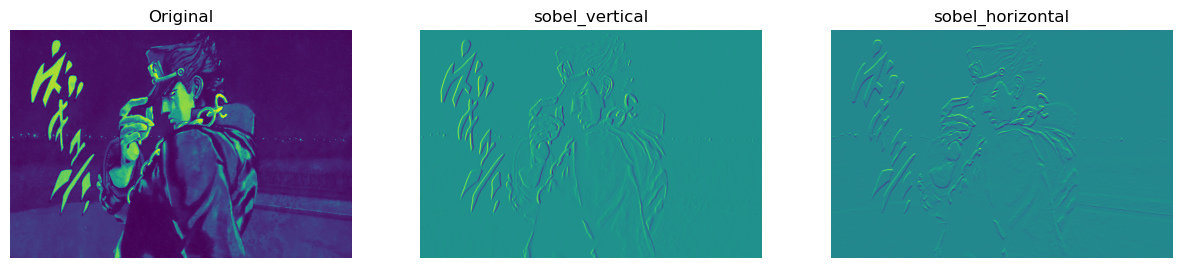

In [21]:
plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(img), plt.title('Original')
plt.axis("off")

plt.subplot(132),plt.imshow(sobel_vertical), plt.title('sobel_vertical')
plt.axis("off")

plt.subplot(133),plt.imshow(sobel_horizontal), plt.title('sobel_horizontal')
plt.axis("off")

plt.show()

<font size="4">Задание 6.7.

Сравнить оба способа для горизонтального фильтра Собела с преобразованием в cv2.CV_8U и без него.

In [22]:
img = cv2.imread('jojo.jpg', 0)

In [23]:
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

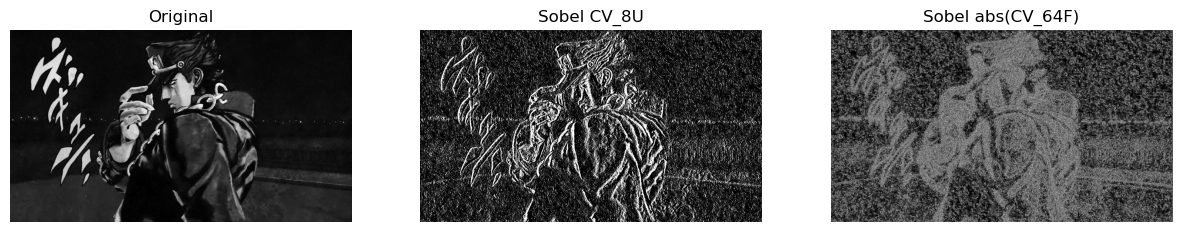

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(img, cmap = 'gray'), plt.title('Original')
plt.axis("off")

plt.subplot(132),plt.imshow(sobelx8u, cmap = 'gray'), plt.title('Sobel CV_8U')
plt.axis("off")

plt.subplot(133),plt.imshow(sobel_8u, cmap = 'gray'), plt.title('Sobel abs(CV_64F)')
plt.axis("off")

plt.show()


<font size="4">Задание 6.8.

Создать файл с изображением, который обязательно содержит вертикальные и горизонтальные линии. С помощью оператора Превитта обнаружить и выделить эти линии.

In [25]:
img = cv2.imread('jojo.jpg', 0)
img = cv2.resize(img, (900, 600))

In [26]:
xkernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
ykernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

In [27]:
img_prewittx = cv2.filter2D(img, -1, xkernel)
img_prewitty = cv2.filter2D(img, -1, ykernel)

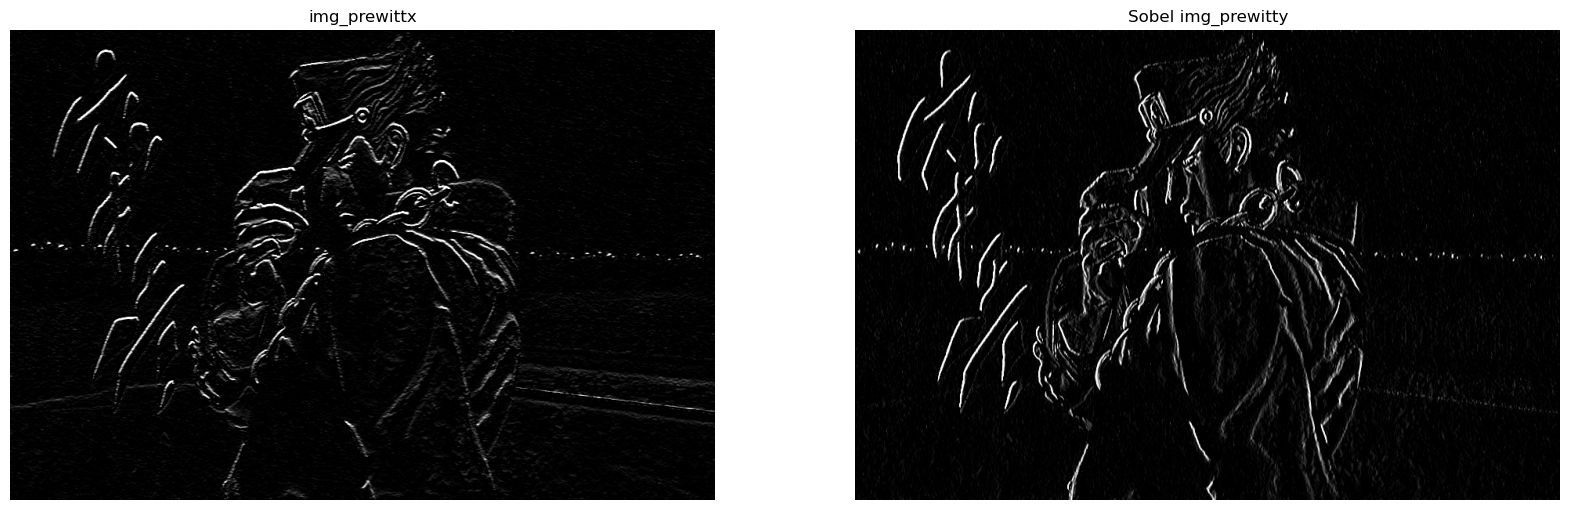

In [28]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img_prewittx, cmap = 'gray'), plt.title('img_prewittx')
plt.axis("off")

plt.subplot(122),plt.imshow(img_prewitty, cmap = 'gray'), plt.title('Sobel img_prewitty')
plt.axis("off")

plt.show()

<font size="4">Задание 6.9.

Используя оператор Робертса, выделить линии на изображении.

In [29]:
kernel1 = np.array([[1, 0], [0, 1]])
kernel2 = np.array ([[0, 1],[0, 1]])

In [30]:
img_robx = cv2.filter2D(img, -1, kernel1)
img_roby = cv2.filter2D(img, -1, kernel2)

output_image = img_robx + img_roby

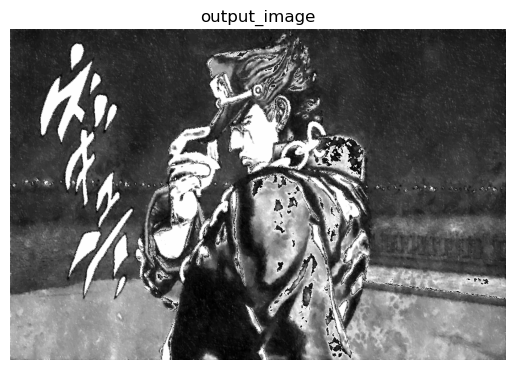

In [31]:
plt.imshow(output_image, cmap = 'gray'), plt.title('output_image')
plt.axis("off")
plt.show()

<font size="4">Задание 6.10.

Создать файл с изображением, в котором присутствуют перепады изображения. С помощью оператора Лапласа обнаружить и выделить эти перепады.

In [32]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

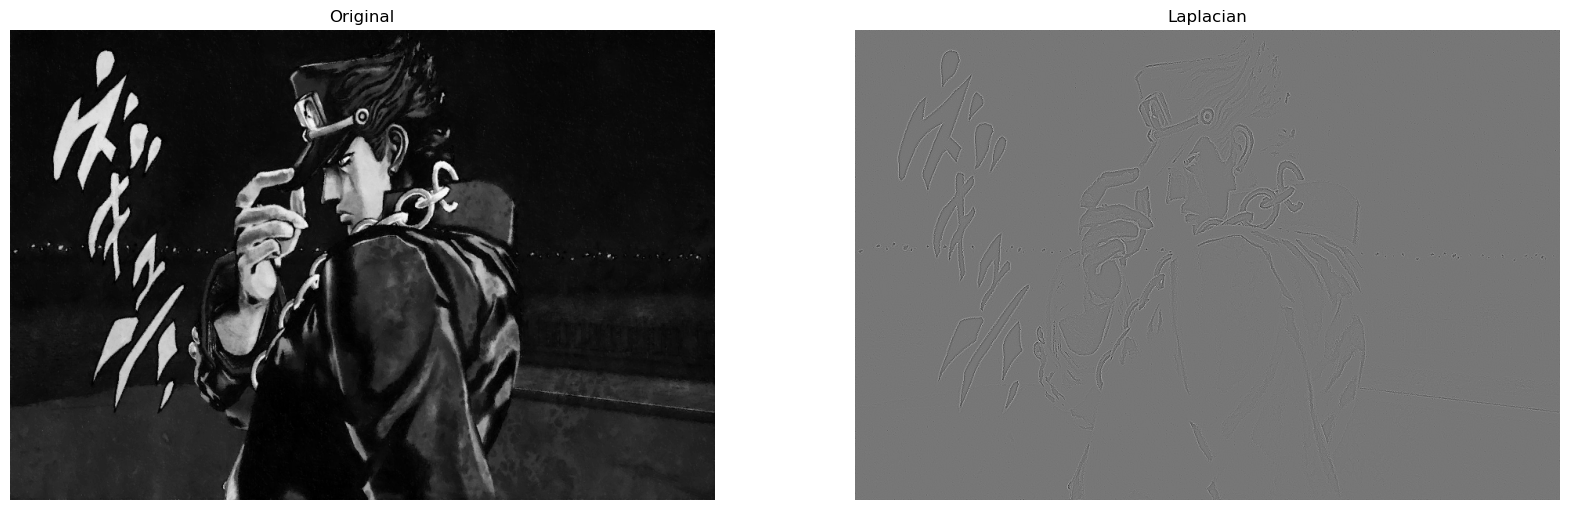

In [33]:
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img, cmap = 'gray'), plt.title('Original')
plt.axis("off")

plt.subplot(122),plt.imshow(laplacian, cmap = 'gray'), plt.title('Laplacian')
plt.axis("off")

plt.show()